## Maximum likelihood mapmaking

2025-11-28 16:48:32.425 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 57.1MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -2.311e-04
    max: -5.838e-08
    rms: 2.941e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


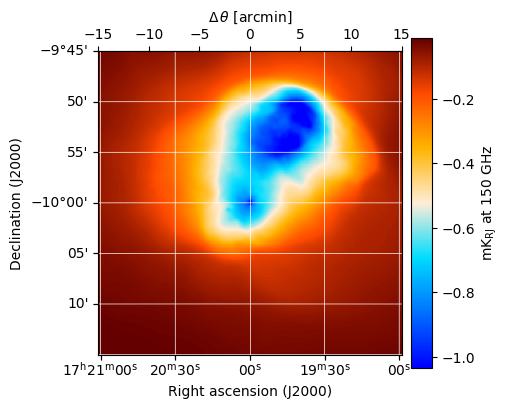

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 2e1

input_map[..., 256:-256, 256:-256].to("K_RJ").plot(cmap="cmb")
print(input_map)

PlanList(1 plans, 900 s):
                           start_time duration target(ra,dec)     center(az,el)
chunk                                                                          
0      2025-11-28 16:48:33.810 +00:00    900 s   (260°, -10°)  (25.97°, 75.74°)


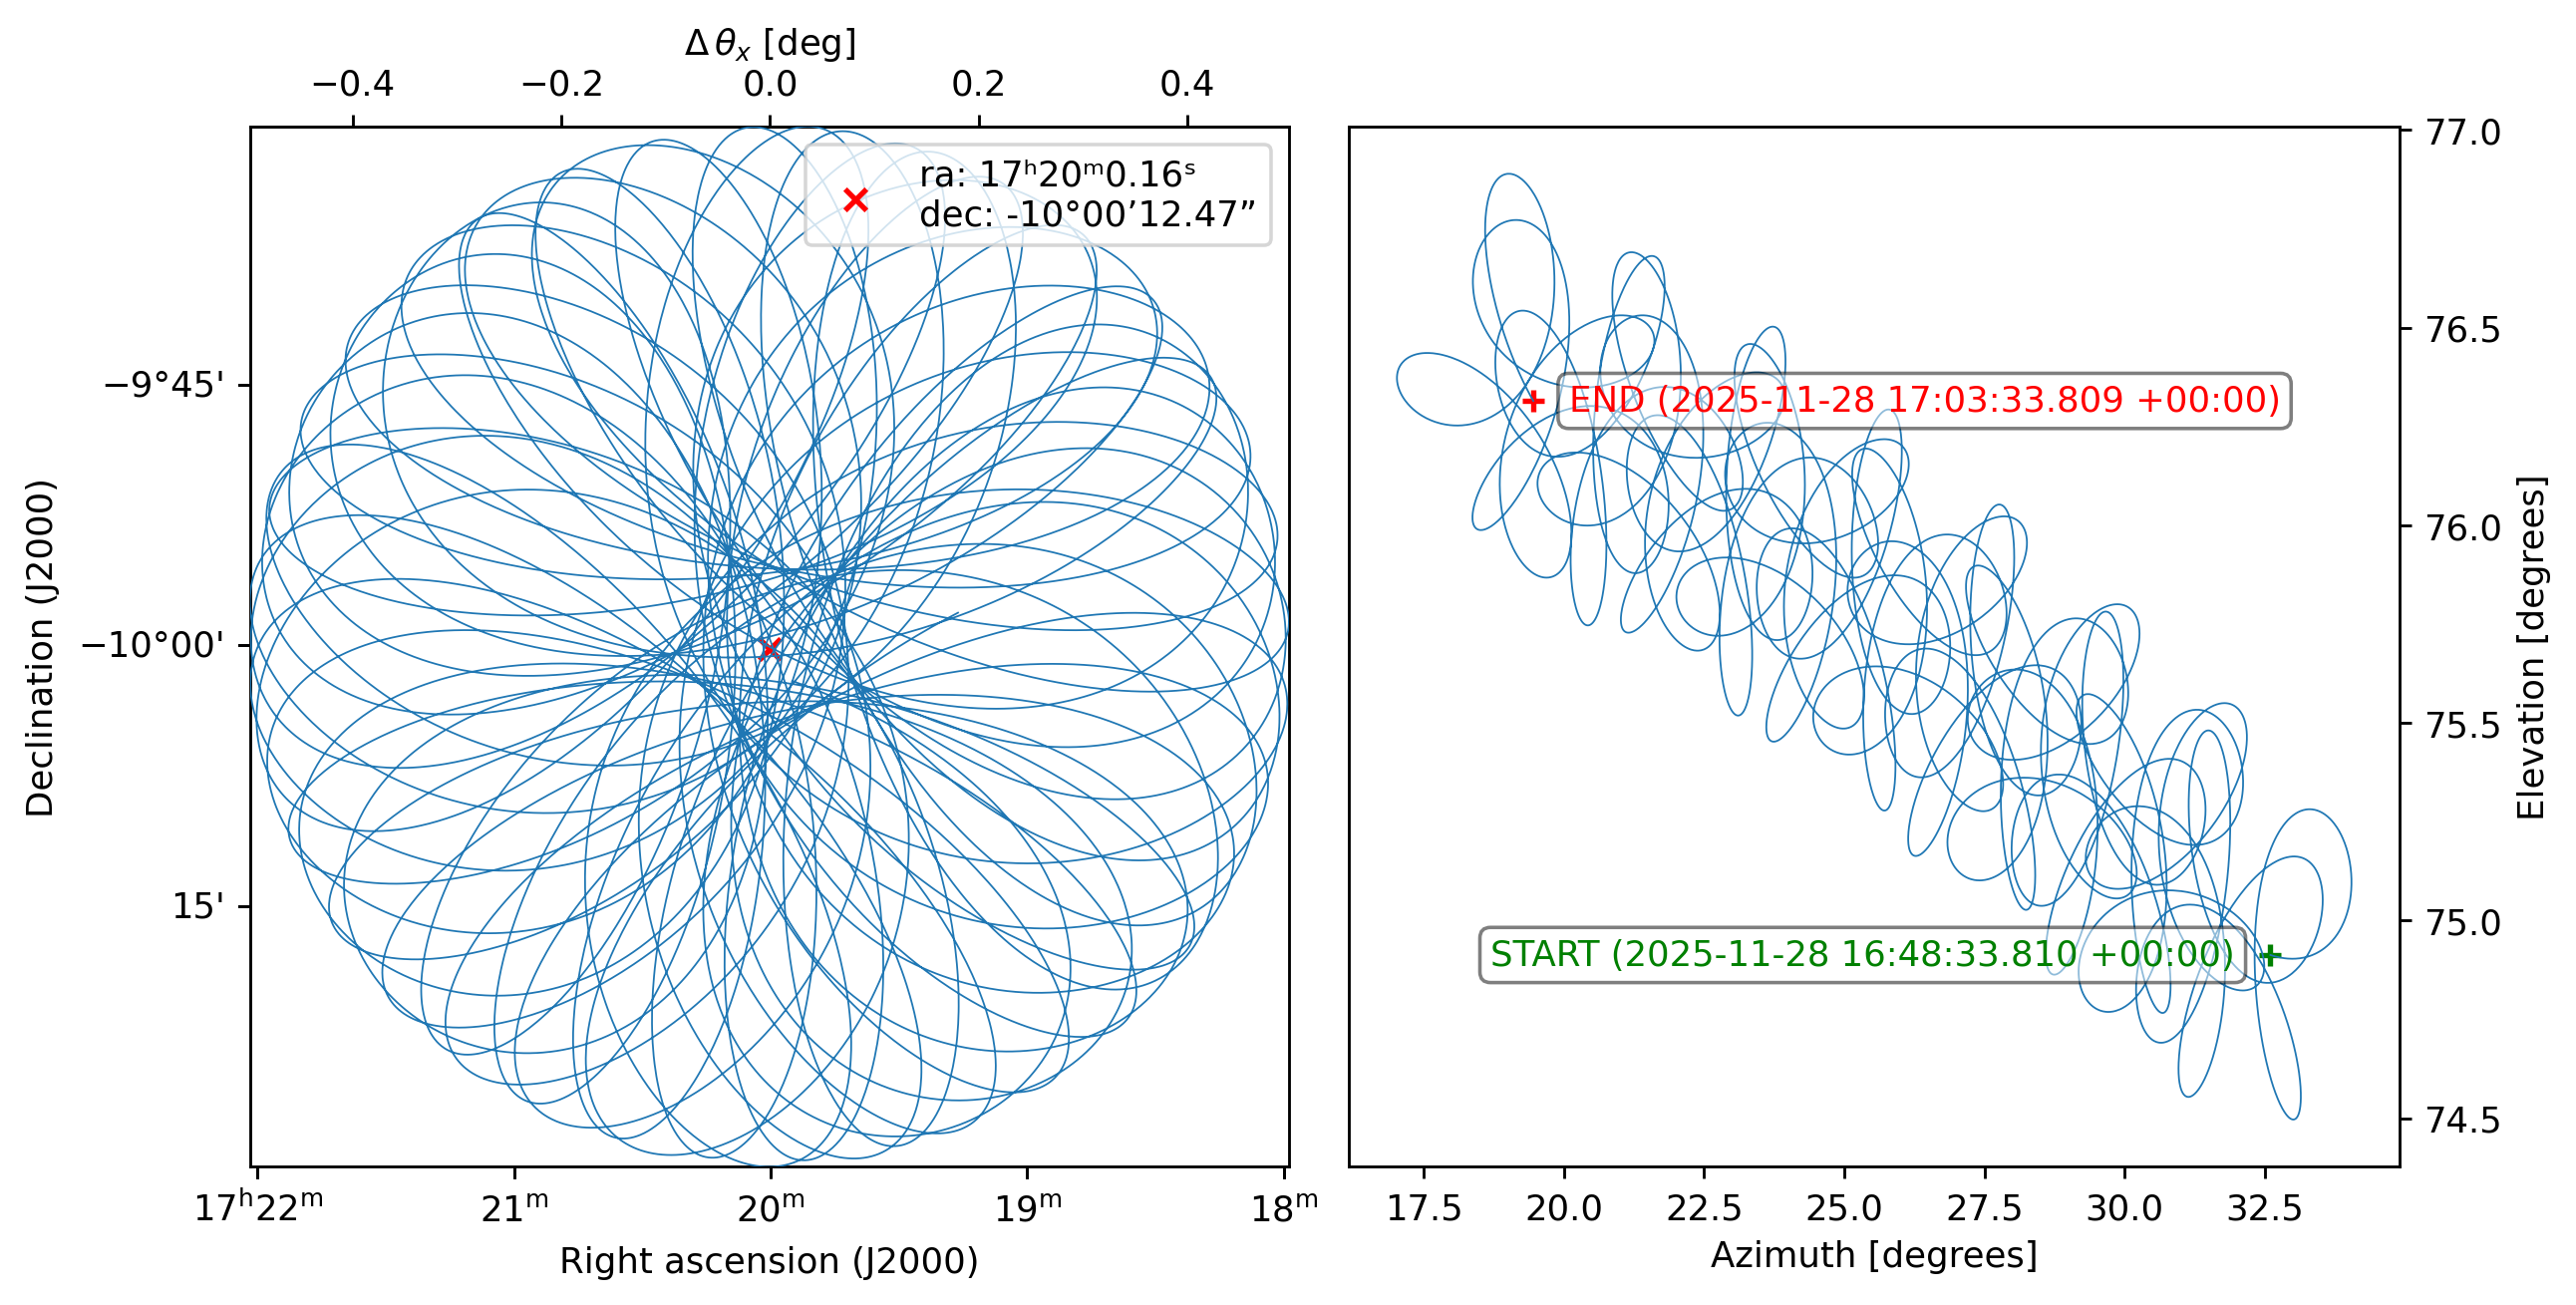

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=900, 
                               max_chunk_duration=900, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  678  11.91’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB     FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  0.3499’


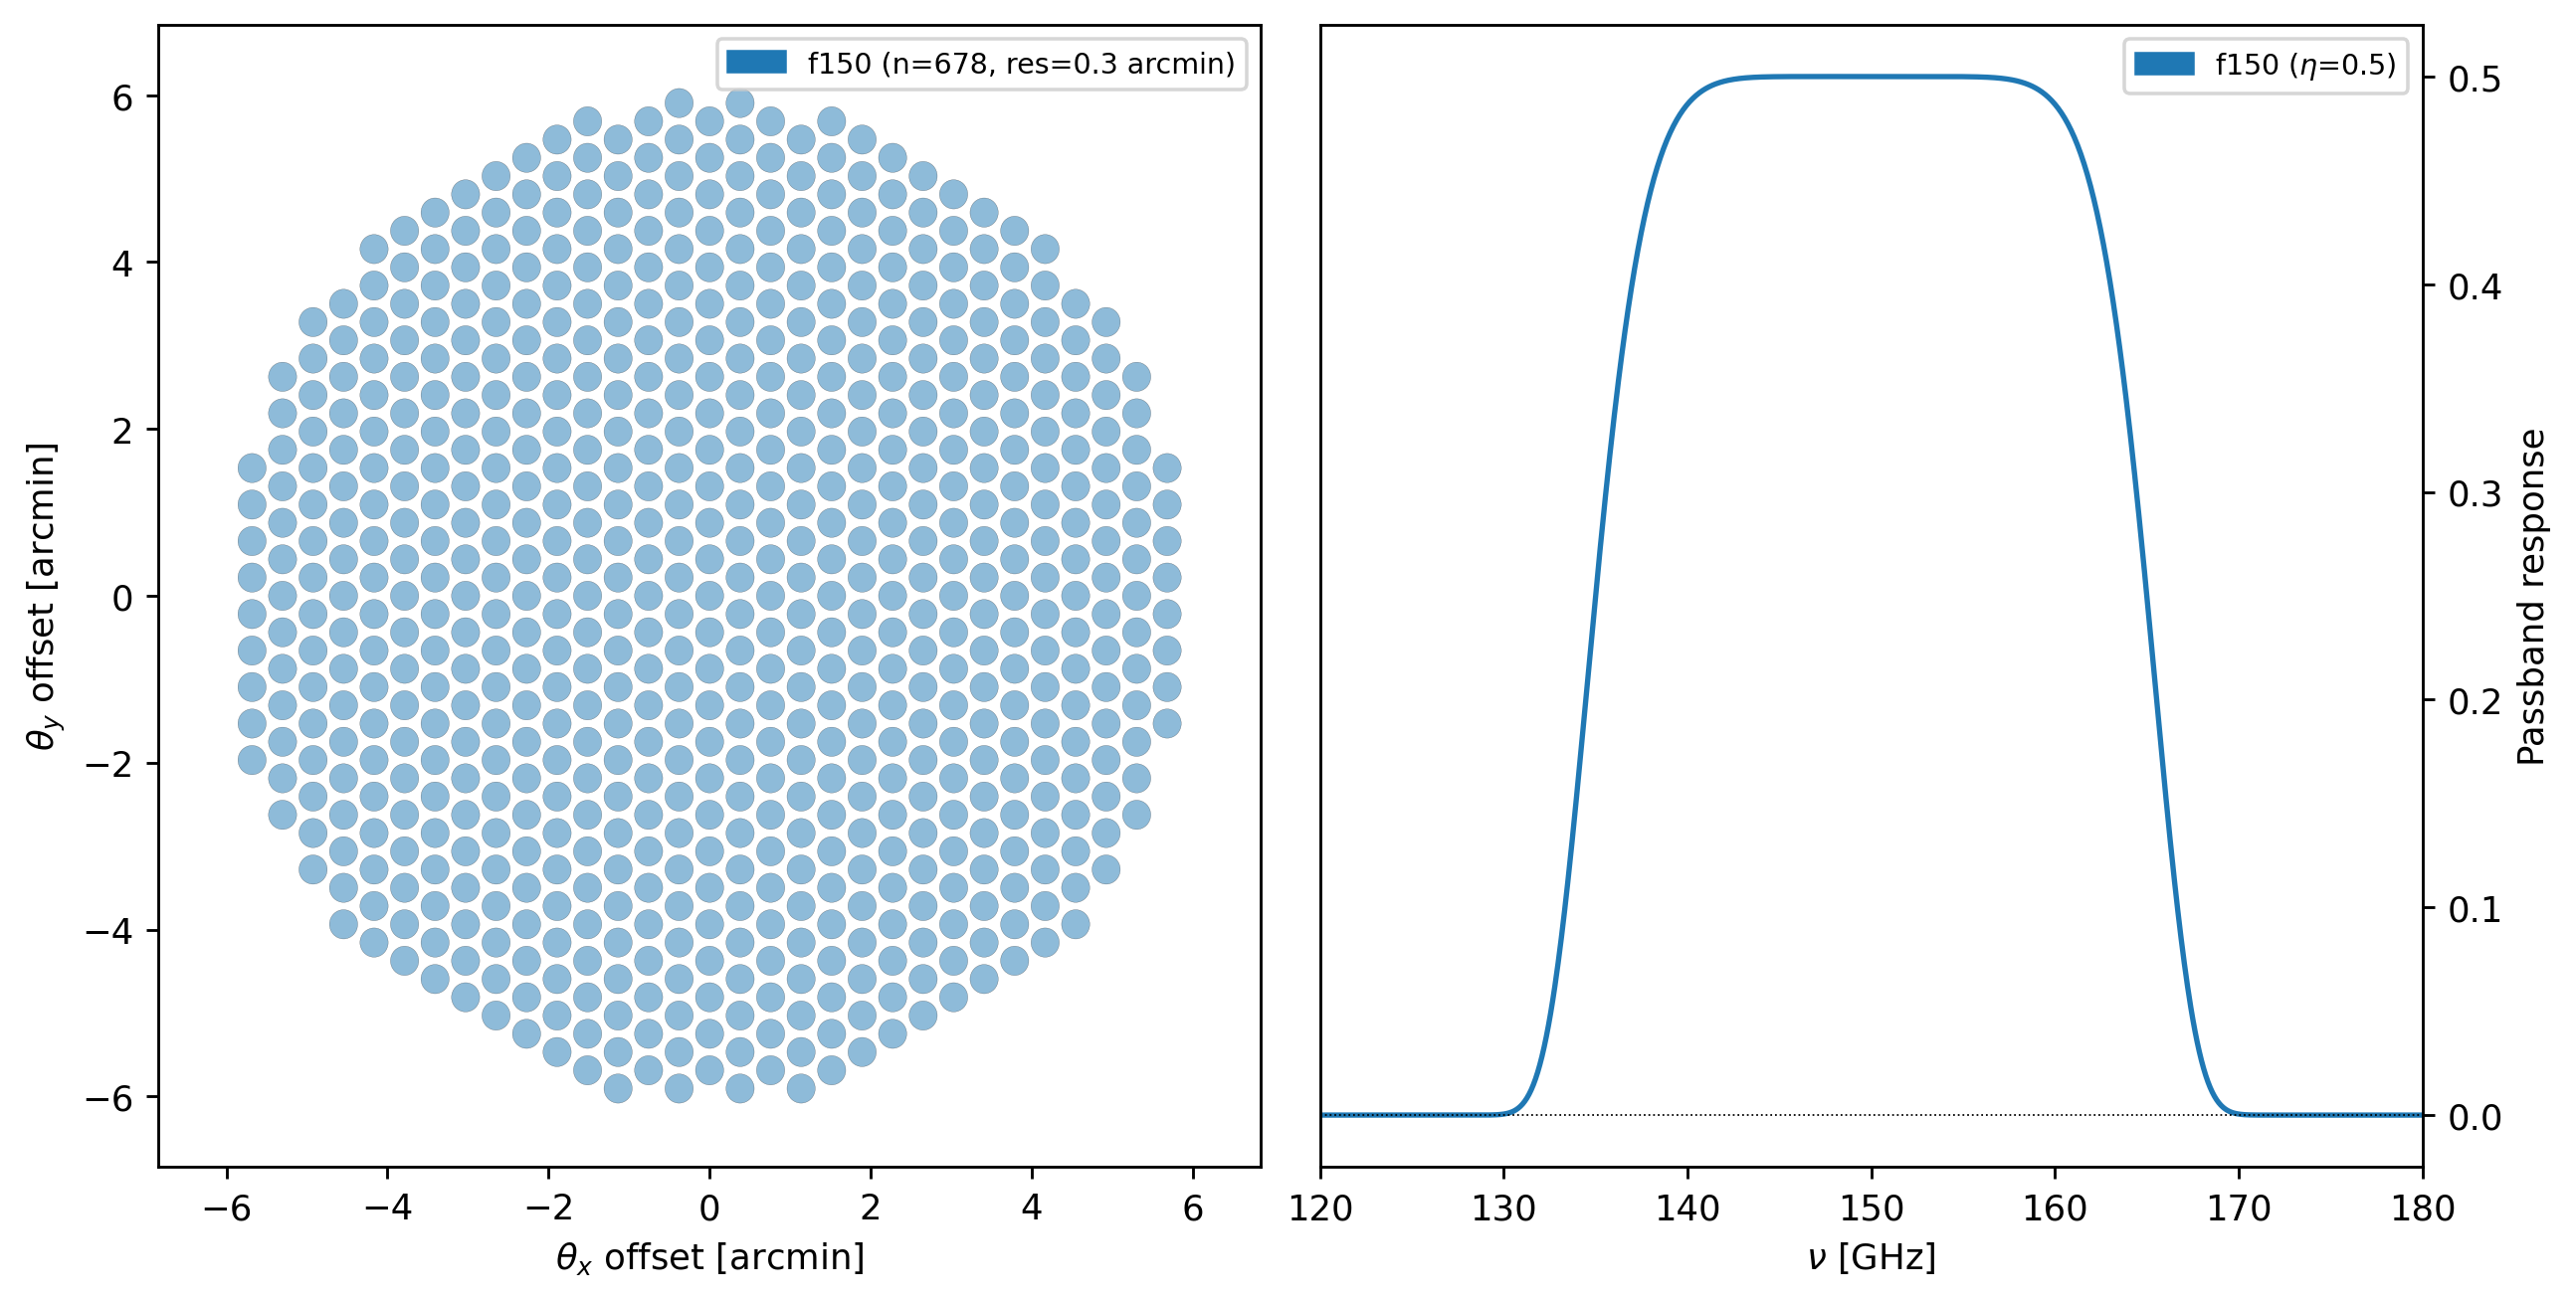

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e1, 
    gain_error=2e-2)

array = {"field_of_view": 0.2, 
         "beam_spacing": 1.25,
         "primary_size": 25, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  678  11.91’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB     FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  0.3499’
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(1 plans, 900 s):
│                            start_time duration target(ra,dec)     center(az,el)
│ chunk                                                                          
│ 0      2025-11-28 16:48:33.810 +00:00    900 s   (260°, -10°)  (25.97°, 75.74°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.] GHz
    t: [1.76434851e+09]
    z: naive
    quantity: spectral_flux_density_per_pixel

2025-11-28 16:48:42.347 INFO: Simulating observation 1 of 1


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:01<00:13,  1.91s/it]

Constructing atmosphere:  25%|████            | 2/8 [00:03<00:10,  1.79s/it]

Constructing atmosphere:  38%|██████          | 3/8 [00:05<00:08,  1.75s/it]

Constructing atmosphere:  50%|████████        | 4/8 [00:06<00:06,  1.72s/it]

Constructing atmosphere:  62%|██████████      | 5/8 [00:08<00:04,  1.65s/it]

Constructing atmosphere:  75%|████████████    | 6/8 [00:10<00:03,  1.70s/it]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:11<00:01,  1.66s/it]

Constructing atmosphere: 100%|████████████████| 8/8 [00:13<00:00,  1.71s/it]

Constructing atmosphere: 100%|████████████████| 8/8 [00:13<00:00,  1.72s/it]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  25%|████            | 2/8 [00:00<00:00, 19.52it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 16.81it/s]

Generating turbulence:  75%|████████████    | 6/8 [00:00<00:00, 11.31it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:01<00:00,  6.28it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:01<00:00,  7.88it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:10,  1.44s/it]

Sampling turbulence:  25%|████            | 2/8 [00:02<00:05,  1.05it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.26it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:03<00:02,  1.39it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:02,  1.45it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:04<00:01,  1.47it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:05<00:00,  1.48it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:05<00:00,  1.48it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:05<00:00,  1.35it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:01<00:00,  1.51s/it, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:01<00:00,  1.51s/it, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map:   0%|                | 0/1 [00:06<?, ?it/s, band=f150, channel=(0 Hz, inf Hz)]

Sampling map: 100%|████████████████| 1/1 [00:13<00:00, 13.79s/it, band=f150, channel=(0 Hz, inf Hz)]

Sampling map: 100%|████████████████| 1/1 [00:13<00:00, 13.79s/it, band=f150, channel=(0 Hz, inf Hz)]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.30s/it, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.30s/it, band=f150]

2025-11-28 16:49:39.837 INFO: Simulated observation 1 of 1 in 57.48 s


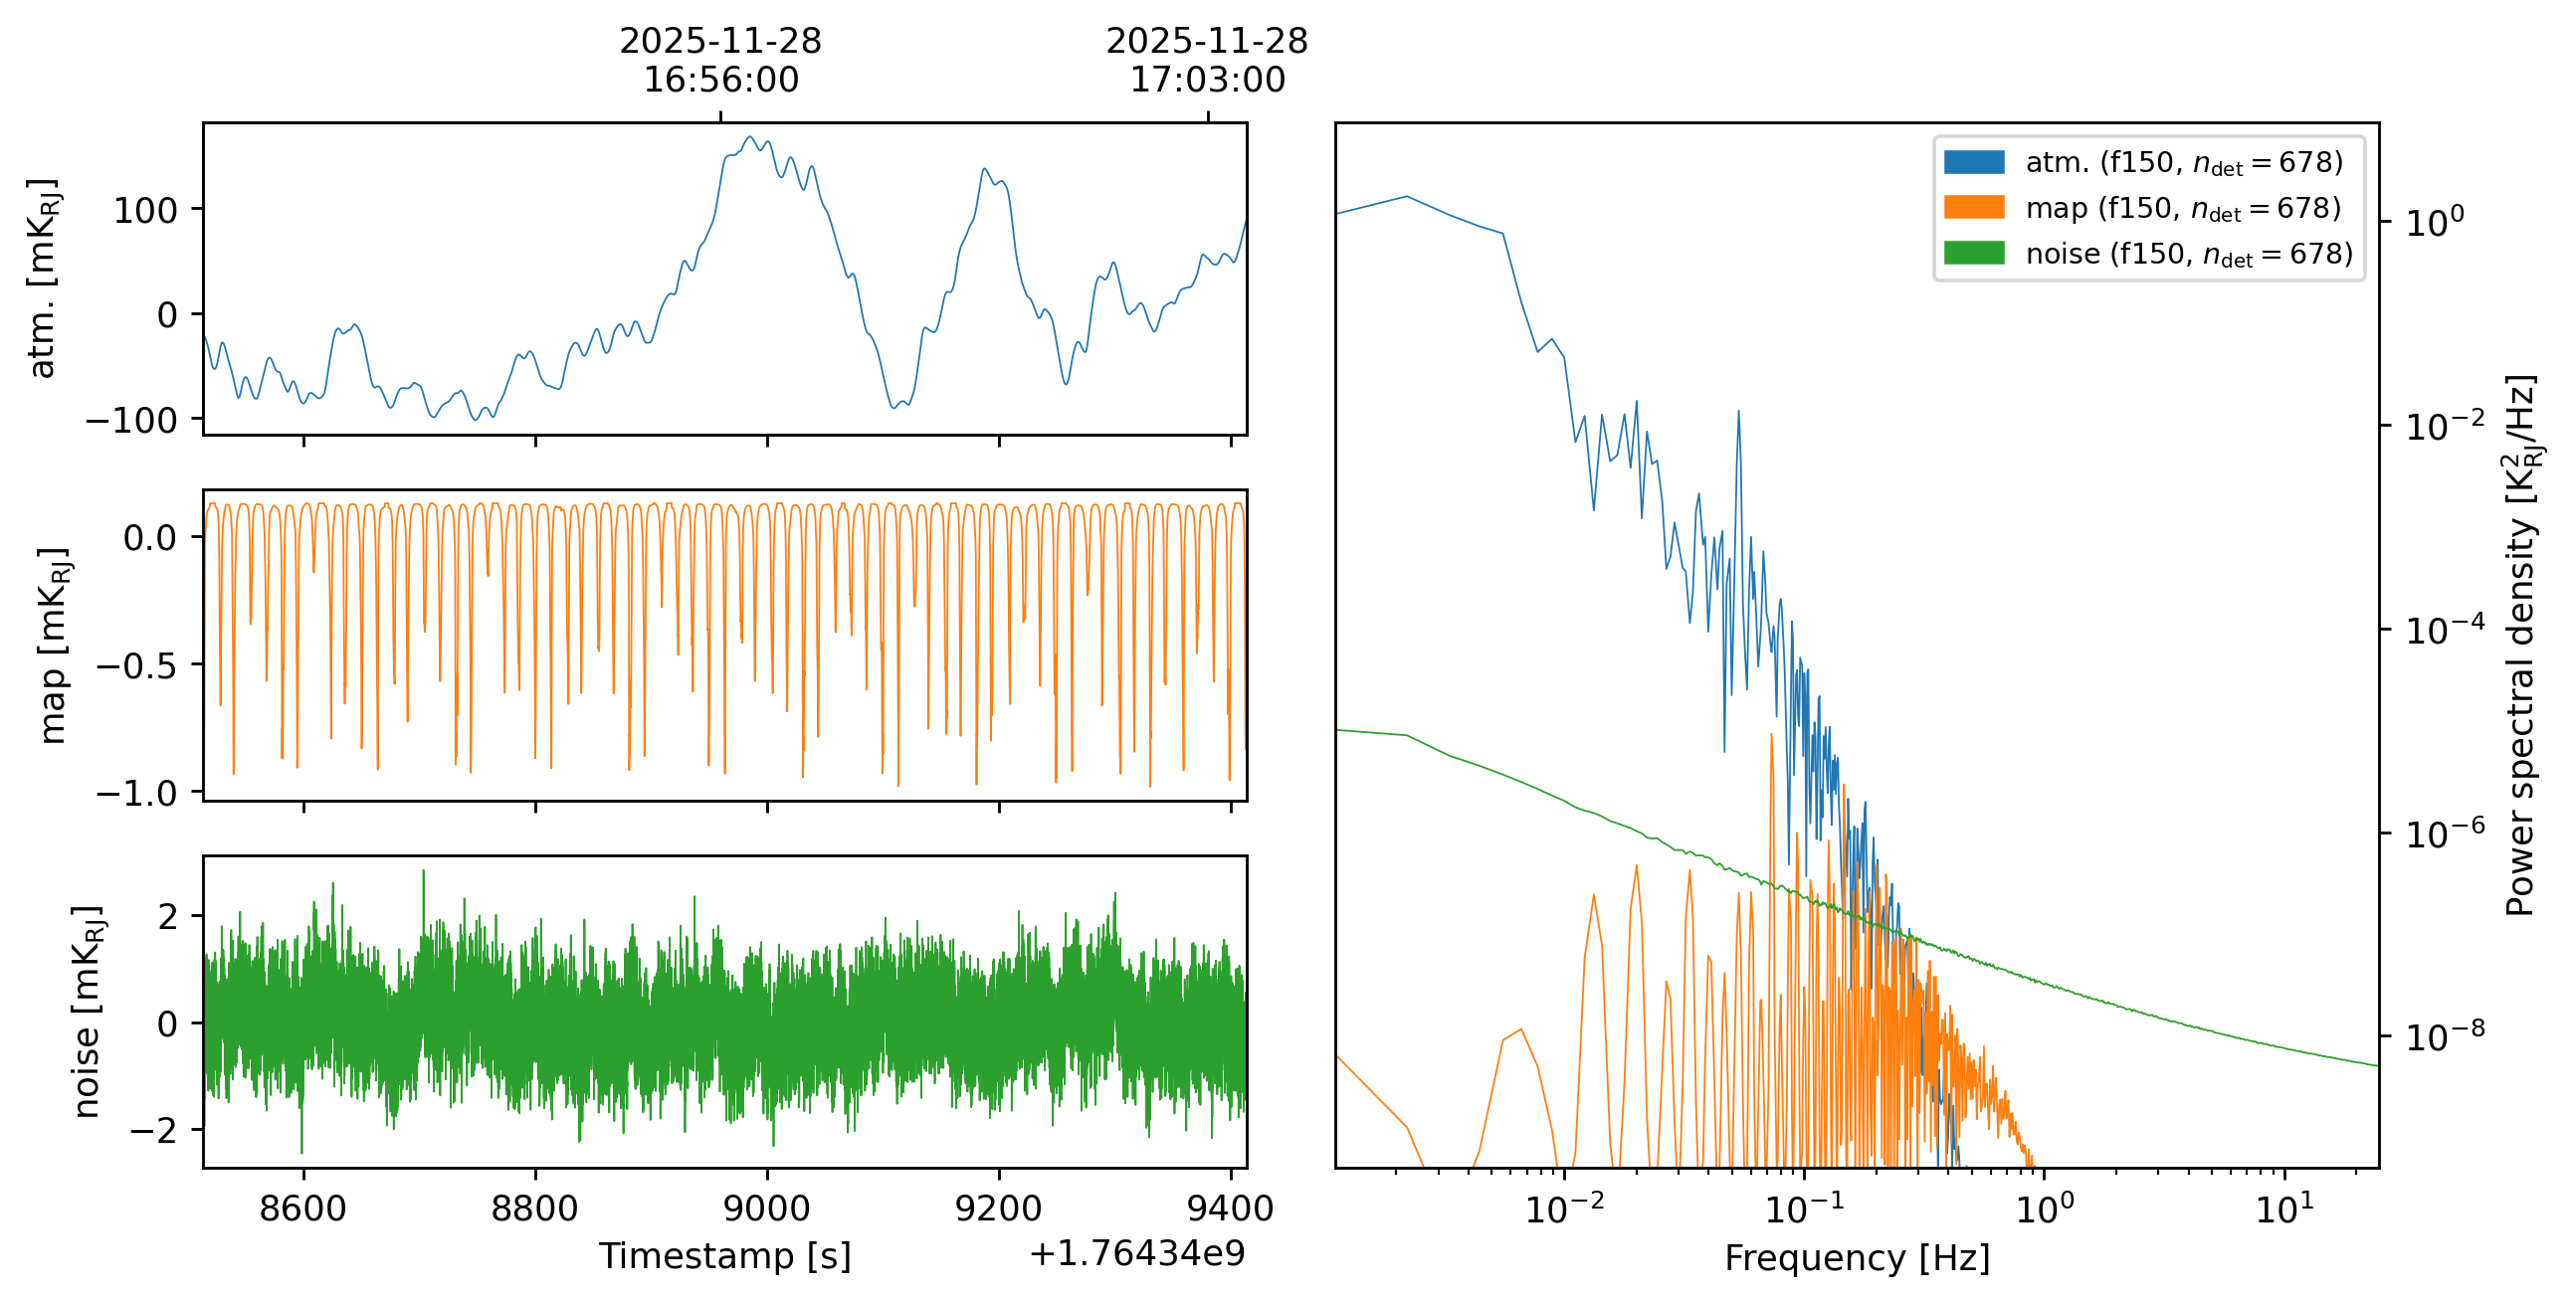

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(tods=tods, 
                                    width=0.75 * input_map.width.deg,
                                    height=0.75 * input_map.height.deg,
                                    resolution=10 * input_map.resolution.deg,
                                    units="mK_RJ")
print(f"{ml_mapper.loss() = }")

2025-11-28 16:49:49.335 INFO: Inferring center {'ra': '17ʰ20ᵐ0.18ˢ', 'dec': '-10°00’10.52”'} for mapper.


2025-11-28 16:49:49.337 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/1 [00:00<?, ?it/s]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.34s/it]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.35s/it]

Mapping:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it, tod=1/1]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:04<00:00,  4.75s/it, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:04<00:00,  4.75s/it, tod=1/1]

ml_mapper.loss() = tensor(0.0557, grad_fn=<AddBackward0>)


The initial map is a "guess" constructing by heavily filtering the input TODs:

ProjectionMap:
  shape(stokes, nu, t, y, x): (1, 1, 1, 76, 76)
  stokes: I
  nu: [150.] GHz
  t: [1.76434896e+09]
  z: naive
  quantity: rayleigh_jeans_temperature
  units: mK_RJ
    min: -4.102e-01
    max: 1.357e-01
    rms: 6.770e-02
  center:
    ra: 17ʰ20ᵐ0.18ˢ
    dec: -10°00’10.52”
  size(y, x): (0.7422°, 0.7422°)
  resolution(y, x): (0.5859’, 0.5859’)
  beam(maj, min, rot): [[[[0.34992376 0.34992376 0.        ]]]]’
  memory: 92.42 kB


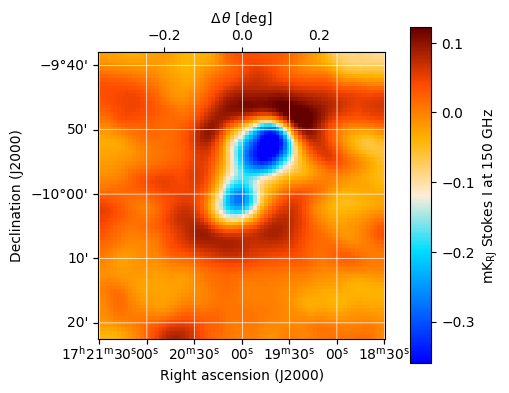

In [7]:
print(ml_mapper.map)
ml_mapper.map.plot(cmap="cmb")


To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=2e-1)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:03<?, ?it/s, loss=5.565e-02]

epoch 1/4:   3%|▌               | 1/32 [00:03<01:47,  3.47s/it, loss=5.565e-02]

epoch 1/4:   3%|▌               | 1/32 [00:06<01:47,  3.47s/it, loss=6.874e-02]

epoch 1/4:   6%|█               | 2/32 [00:06<01:43,  3.46s/it, loss=6.874e-02]

epoch 1/4:   6%|█               | 2/32 [00:10<01:43,  3.46s/it, loss=2.367e-02]

epoch 1/4:   9%|█▌              | 3/32 [00:10<01:40,  3.46s/it, loss=2.367e-02]

epoch 1/4:   9%|█▌              | 3/32 [00:13<01:40,  3.46s/it, loss=2.170e-02]

epoch 1/4:  12%|██              | 4/32 [00:13<01:36,  3.46s/it, loss=2.170e-02]

epoch 1/4:  12%|██              | 4/32 [00:17<01:36,  3.46s/it, loss=2.933e-02]

epoch 1/4:  16%|██▌             | 5/32 [00:17<01:33,  3.46s/it, loss=2.933e-02]

epoch 1/4:  16%|██▌             | 5/32 [00:20<01:33,  3.46s/it, loss=2.984e-02]

epoch 1/4:  19%|███             | 6/32 [00:20<01:29,  3.46s/it, loss=2.984e-02]

epoch 1/4:  19%|███             | 6/32 [00:24<01:29,  3.46s/it, loss=2.488e-02]

epoch 1/4:  22%|███▌            | 7/32 [00:24<01:26,  3.46s/it, loss=2.488e-02]

epoch 1/4:  22%|███▌            | 7/32 [00:27<01:26,  3.46s/it, loss=1.890e-02]

epoch 1/4:  25%|████            | 8/32 [00:27<01:23,  3.47s/it, loss=1.890e-02]

epoch 1/4:  25%|████            | 8/32 [00:31<01:23,  3.47s/it, loss=1.497e-02]

epoch 1/4:  28%|████▌           | 9/32 [00:31<01:19,  3.47s/it, loss=1.497e-02]

epoch 1/4:  28%|████▌           | 9/32 [00:34<01:19,  3.47s/it, loss=1.420e-02]

epoch 1/4:  31%|█████           | 10/32 [00:34<01:16,  3.47s/it, loss=1.420e-02]

epoch 1/4:  31%|█████           | 10/32 [00:38<01:16,  3.47s/it, loss=1.535e-02]

epoch 1/4:  34%|█████▌          | 11/32 [00:38<01:12,  3.47s/it, loss=1.535e-02]

epoch 1/4:  34%|█████▌          | 11/32 [00:41<01:12,  3.47s/it, loss=1.576e-02]

epoch 1/4:  38%|██████          | 12/32 [00:41<01:09,  3.47s/it, loss=1.576e-02]

epoch 1/4:  38%|██████          | 12/32 [00:45<01:09,  3.47s/it, loss=1.412e-02]

epoch 1/4:  41%|██████▌         | 13/32 [00:45<01:06,  3.48s/it, loss=1.412e-02]

epoch 1/4:  41%|██████▌         | 13/32 [00:48<01:06,  3.48s/it, loss=1.166e-02]

epoch 1/4:  44%|███████         | 14/32 [00:48<01:02,  3.48s/it, loss=1.166e-02]

epoch 1/4:  44%|███████         | 14/32 [00:52<01:02,  3.48s/it, loss=1.005e-02]

epoch 1/4:  47%|███████▌        | 15/32 [00:52<00:59,  3.49s/it, loss=1.005e-02]

epoch 1/4:  47%|███████▌        | 15/32 [00:55<00:59,  3.49s/it, loss=9.685e-03]

epoch 1/4:  50%|████████        | 16/32 [00:55<00:55,  3.49s/it, loss=9.685e-03]

epoch 1/4:  50%|████████        | 16/32 [00:59<00:55,  3.49s/it, loss=9.841e-03]

epoch 1/4:  53%|████████▌       | 17/32 [00:59<00:52,  3.48s/it, loss=9.841e-03]

epoch 1/4:  53%|████████▌       | 17/32 [01:02<00:52,  3.48s/it, loss=9.731e-03]

epoch 1/4:  56%|█████████       | 18/32 [01:02<00:48,  3.48s/it, loss=9.731e-03]

epoch 1/4:  56%|█████████       | 18/32 [01:06<00:48,  3.48s/it, loss=9.057e-03]

epoch 1/4:  59%|█████████▌      | 19/32 [01:06<00:45,  3.49s/it, loss=9.057e-03]

epoch 1/4:  59%|█████████▌      | 19/32 [01:09<00:45,  3.49s/it, loss=8.062e-03]

epoch 1/4:  62%|██████████      | 20/32 [01:09<00:41,  3.49s/it, loss=8.062e-03]

epoch 1/4:  62%|██████████      | 20/32 [01:13<00:41,  3.49s/it, loss=7.208e-03]

epoch 1/4:  66%|██████████▌     | 21/32 [01:13<00:38,  3.49s/it, loss=7.208e-03]

epoch 1/4:  66%|██████████▌     | 21/32 [01:16<00:38,  3.49s/it, loss=6.737e-03]

epoch 1/4:  69%|███████████     | 22/32 [01:16<00:34,  3.49s/it, loss=6.737e-03]

epoch 1/4:  69%|███████████     | 22/32 [01:19<00:34,  3.49s/it, loss=6.469e-03]

epoch 1/4:  72%|███████████▌    | 23/32 [01:19<00:31,  3.48s/it, loss=6.469e-03]

epoch 1/4:  72%|███████████▌    | 23/32 [01:23<00:31,  3.48s/it, loss=6.106e-03]

epoch 1/4:  75%|████████████    | 24/32 [01:23<00:27,  3.48s/it, loss=6.106e-03]

epoch 1/4:  75%|████████████    | 24/32 [01:26<00:27,  3.48s/it, loss=5.618e-03]

epoch 1/4:  78%|████████████▌   | 25/32 [01:26<00:24,  3.48s/it, loss=5.618e-03]

epoch 1/4:  78%|████████████▌   | 25/32 [01:30<00:24,  3.48s/it, loss=5.181e-03]

epoch 1/4:  81%|█████████████   | 26/32 [01:30<00:20,  3.48s/it, loss=5.181e-03]

epoch 1/4:  81%|█████████████   | 26/32 [01:33<00:20,  3.48s/it, loss=4.889e-03]

epoch 1/4:  84%|█████████████▌  | 27/32 [01:33<00:17,  3.48s/it, loss=4.889e-03]

epoch 1/4:  84%|█████████████▌  | 27/32 [01:37<00:17,  3.48s/it, loss=4.676e-03]

epoch 1/4:  88%|██████████████  | 28/32 [01:37<00:13,  3.48s/it, loss=4.676e-03]

epoch 1/4:  88%|██████████████  | 28/32 [01:40<00:13,  3.48s/it, loss=4.438e-03]

epoch 1/4:  91%|██████████████▌ | 29/32 [01:40<00:10,  3.47s/it, loss=4.438e-03]

epoch 1/4:  91%|██████████████▌ | 29/32 [01:44<00:10,  3.47s/it, loss=4.157e-03]

epoch 1/4:  94%|███████████████ | 30/32 [01:44<00:06,  3.47s/it, loss=4.157e-03]

epoch 1/4:  94%|███████████████ | 30/32 [01:47<00:06,  3.47s/it, loss=3.890e-03]

epoch 1/4:  97%|███████████████▌| 31/32 [01:47<00:03,  3.47s/it, loss=3.890e-03]

epoch 1/4:  97%|███████████████▌| 31/32 [01:51<00:03,  3.47s/it, loss=3.680e-03]

epoch 1/4: 100%|████████████████| 32/32 [01:51<00:00,  3.47s/it, loss=3.680e-03]

epoch 1/4: 100%|████████████████| 32/32 [01:51<00:00,  3.48s/it, loss=3.680e-03]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:03<?, ?it/s, loss=3.504e-03]

epoch 2/4:   3%|▌               | 1/32 [00:03<01:48,  3.49s/it, loss=3.504e-03]

epoch 2/4:   3%|▌               | 1/32 [00:06<01:48,  3.49s/it, loss=3.316e-03]

epoch 2/4:   6%|█               | 2/32 [00:06<01:44,  3.49s/it, loss=3.316e-03]

epoch 2/4:   6%|█               | 2/32 [00:10<01:44,  3.49s/it, loss=3.125e-03]

epoch 2/4:   9%|█▌              | 3/32 [00:10<01:41,  3.49s/it, loss=3.125e-03]

epoch 2/4:   9%|█▌              | 3/32 [00:13<01:41,  3.49s/it, loss=2.973e-03]

epoch 2/4:  12%|██              | 4/32 [00:13<01:37,  3.48s/it, loss=2.973e-03]

epoch 2/4:  12%|██              | 4/32 [00:17<01:37,  3.48s/it, loss=2.868e-03]

epoch 2/4:  16%|██▌             | 5/32 [00:17<01:33,  3.48s/it, loss=2.868e-03]

epoch 2/4:  16%|██▌             | 5/32 [00:20<01:33,  3.48s/it, loss=2.770e-03]

epoch 2/4:  19%|███             | 6/32 [00:20<01:30,  3.48s/it, loss=2.770e-03]

epoch 2/4:  19%|███             | 6/32 [00:24<01:30,  3.48s/it, loss=2.647e-03]

epoch 2/4:  22%|███▌            | 7/32 [00:24<01:26,  3.47s/it, loss=2.647e-03]

epoch 2/4:  22%|███▌            | 7/32 [00:27<01:26,  3.47s/it, loss=2.508e-03]

epoch 2/4:  25%|████            | 8/32 [00:27<01:23,  3.47s/it, loss=2.508e-03]

epoch 2/4:  25%|████            | 8/32 [00:31<01:23,  3.47s/it, loss=2.385e-03]

epoch 2/4:  28%|████▌           | 9/32 [00:31<01:19,  3.47s/it, loss=2.385e-03]

epoch 2/4:  28%|████▌           | 9/32 [00:34<01:19,  3.47s/it, loss=2.285e-03]

epoch 2/4:  31%|█████           | 10/32 [00:34<01:16,  3.47s/it, loss=2.285e-03]

epoch 2/4:  31%|█████           | 10/32 [00:38<01:16,  3.47s/it, loss=2.192e-03]

epoch 2/4:  34%|█████▌          | 11/32 [00:38<01:13,  3.48s/it, loss=2.192e-03]

epoch 2/4:  34%|█████▌          | 11/32 [00:41<01:13,  3.48s/it, loss=2.093e-03]

epoch 2/4:  38%|██████          | 12/32 [00:41<01:09,  3.48s/it, loss=2.093e-03]

epoch 2/4:  38%|██████          | 12/32 [00:45<01:09,  3.48s/it, loss=1.993e-03]

epoch 2/4:  41%|██████▌         | 13/32 [00:45<01:06,  3.48s/it, loss=1.993e-03]

epoch 2/4:  41%|██████▌         | 13/32 [00:48<01:06,  3.48s/it, loss=1.906e-03]

epoch 2/4:  44%|███████         | 14/32 [00:48<01:02,  3.48s/it, loss=1.906e-03]

epoch 2/4:  44%|███████         | 14/32 [00:52<01:02,  3.48s/it, loss=1.830e-03]

epoch 2/4:  47%|███████▌        | 15/32 [00:52<00:59,  3.47s/it, loss=1.830e-03]

epoch 2/4:  47%|███████▌        | 15/32 [00:55<00:59,  3.47s/it, loss=1.760e-03]

epoch 2/4:  50%|████████        | 16/32 [00:55<00:55,  3.47s/it, loss=1.760e-03]

epoch 2/4:  50%|████████        | 16/32 [00:59<00:55,  3.47s/it, loss=1.693e-03]

epoch 2/4:  53%|████████▌       | 17/32 [00:59<00:52,  3.47s/it, loss=1.693e-03]

epoch 2/4:  53%|████████▌       | 17/32 [01:02<00:52,  3.47s/it, loss=1.631e-03]

epoch 2/4:  56%|█████████       | 18/32 [01:02<00:48,  3.48s/it, loss=1.631e-03]

epoch 2/4:  56%|█████████       | 18/32 [01:06<00:48,  3.48s/it, loss=1.575e-03]

epoch 2/4:  59%|█████████▌      | 19/32 [01:06<00:45,  3.48s/it, loss=1.575e-03]

epoch 2/4:  59%|█████████▌      | 19/32 [01:09<00:45,  3.48s/it, loss=1.522e-03]

epoch 2/4:  62%|██████████      | 20/32 [01:09<00:41,  3.48s/it, loss=1.522e-03]

epoch 2/4:  62%|██████████      | 20/32 [01:12<00:41,  3.48s/it, loss=1.470e-03]

epoch 2/4:  66%|██████████▌     | 21/32 [01:12<00:38,  3.48s/it, loss=1.470e-03]

epoch 2/4:  66%|██████████▌     | 21/32 [01:16<00:38,  3.48s/it, loss=1.422e-03]

epoch 2/4:  69%|███████████     | 22/32 [01:16<00:34,  3.48s/it, loss=1.422e-03]

epoch 2/4:  69%|███████████     | 22/32 [01:19<00:34,  3.48s/it, loss=1.380e-03]

epoch 2/4:  72%|███████████▌    | 23/32 [01:19<00:31,  3.48s/it, loss=1.380e-03]

epoch 2/4:  72%|███████████▌    | 23/32 [01:23<00:31,  3.48s/it, loss=1.340e-03]

epoch 2/4:  75%|████████████    | 24/32 [01:23<00:27,  3.48s/it, loss=1.340e-03]

epoch 2/4:  75%|████████████    | 24/32 [01:26<00:27,  3.48s/it, loss=1.298e-03]

epoch 2/4:  78%|████████████▌   | 25/32 [01:26<00:24,  3.48s/it, loss=1.298e-03]

epoch 2/4:  78%|████████████▌   | 25/32 [01:30<00:24,  3.48s/it, loss=1.257e-03]

epoch 2/4:  81%|█████████████   | 26/32 [01:30<00:20,  3.48s/it, loss=1.257e-03]

epoch 2/4:  81%|█████████████   | 26/32 [01:33<00:20,  3.48s/it, loss=1.221e-03]

epoch 2/4:  84%|█████████████▌  | 27/32 [01:33<00:17,  3.48s/it, loss=1.221e-03]

epoch 2/4:  84%|█████████████▌  | 27/32 [01:37<00:17,  3.48s/it, loss=1.188e-03]

epoch 2/4:  88%|██████████████  | 28/32 [01:37<00:13,  3.48s/it, loss=1.188e-03]

epoch 2/4:  88%|██████████████  | 28/32 [01:40<00:13,  3.48s/it, loss=1.157e-03]

epoch 2/4:  91%|██████████████▌ | 29/32 [01:40<00:10,  3.48s/it, loss=1.157e-03]

epoch 2/4:  91%|██████████████▌ | 29/32 [01:44<00:10,  3.48s/it, loss=1.123e-03]

epoch 2/4:  94%|███████████████ | 30/32 [01:44<00:06,  3.47s/it, loss=1.123e-03]

epoch 2/4:  94%|███████████████ | 30/32 [01:47<00:06,  3.47s/it, loss=1.092e-03]

epoch 2/4:  97%|███████████████▌| 31/32 [01:47<00:03,  3.47s/it, loss=1.092e-03]

epoch 2/4:  97%|███████████████▌| 31/32 [01:51<00:03,  3.47s/it, loss=1.065e-03]

epoch 2/4: 100%|████████████████| 32/32 [01:51<00:00,  3.47s/it, loss=1.065e-03]

epoch 2/4: 100%|████████████████| 32/32 [01:51<00:00,  3.48s/it, loss=1.065e-03]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:03<?, ?it/s, loss=1.039e-03]

epoch 3/4:   3%|▌               | 1/32 [00:03<01:47,  3.46s/it, loss=1.039e-03]

epoch 3/4:   3%|▌               | 1/32 [00:06<01:47,  3.46s/it, loss=1.013e-03]

epoch 3/4:   6%|█               | 2/32 [00:06<01:45,  3.50s/it, loss=1.013e-03]

epoch 3/4:   6%|█               | 2/32 [00:10<01:45,  3.50s/it, loss=9.886e-04]

epoch 3/4:   9%|█▌              | 3/32 [00:10<01:41,  3.51s/it, loss=9.886e-04]

epoch 3/4:   9%|█▌              | 3/32 [00:14<01:41,  3.51s/it, loss=9.664e-04]

epoch 3/4:  12%|██              | 4/32 [00:14<01:38,  3.51s/it, loss=9.664e-04]

epoch 3/4:  12%|██              | 4/32 [00:17<01:38,  3.51s/it, loss=9.451e-04]

epoch 3/4:  16%|██▌             | 5/32 [00:17<01:34,  3.50s/it, loss=9.451e-04]

epoch 3/4:  16%|██▌             | 5/32 [00:20<01:34,  3.50s/it, loss=9.239e-04]

epoch 3/4:  19%|███             | 6/32 [00:20<01:30,  3.50s/it, loss=9.239e-04]

epoch 3/4:  19%|███             | 6/32 [00:24<01:30,  3.50s/it, loss=9.038e-04]

epoch 3/4:  22%|███▌            | 7/32 [00:24<01:27,  3.49s/it, loss=9.038e-04]

epoch 3/4:  22%|███▌            | 7/32 [00:27<01:27,  3.49s/it, loss=8.849e-04]

epoch 3/4:  25%|████            | 8/32 [00:27<01:23,  3.48s/it, loss=8.849e-04]

epoch 3/4:  25%|████            | 8/32 [00:31<01:23,  3.48s/it, loss=8.666e-04]

epoch 3/4:  28%|████▌           | 9/32 [00:31<01:19,  3.48s/it, loss=8.666e-04]

epoch 3/4:  28%|████▌           | 9/32 [00:34<01:19,  3.48s/it, loss=8.489e-04]

epoch 3/4:  31%|█████           | 10/32 [00:34<01:16,  3.47s/it, loss=8.489e-04]

epoch 3/4:  31%|█████           | 10/32 [00:38<01:16,  3.47s/it, loss=8.321e-04]

epoch 3/4:  34%|█████▌          | 11/32 [00:38<01:13,  3.48s/it, loss=8.321e-04]

epoch 3/4:  34%|█████▌          | 11/32 [00:41<01:13,  3.48s/it, loss=8.157e-04]

epoch 3/4:  38%|██████          | 12/32 [00:41<01:09,  3.49s/it, loss=8.157e-04]

epoch 3/4:  38%|██████          | 12/32 [00:45<01:09,  3.49s/it, loss=8.001e-04]

epoch 3/4:  41%|██████▌         | 13/32 [00:45<01:06,  3.48s/it, loss=8.001e-04]

epoch 3/4:  41%|██████▌         | 13/32 [00:48<01:06,  3.48s/it, loss=7.853e-04]

epoch 3/4:  44%|███████         | 14/32 [00:48<01:02,  3.48s/it, loss=7.853e-04]

epoch 3/4:  44%|███████         | 14/32 [00:52<01:02,  3.48s/it, loss=7.707e-04]

epoch 3/4:  47%|███████▌        | 15/32 [00:52<00:59,  3.48s/it, loss=7.707e-04]

epoch 3/4:  47%|███████▌        | 15/32 [00:55<00:59,  3.48s/it, loss=7.561e-04]

epoch 3/4:  50%|████████        | 16/32 [00:55<00:55,  3.48s/it, loss=7.561e-04]

epoch 3/4:  50%|████████        | 16/32 [00:59<00:55,  3.48s/it, loss=7.422e-04]

epoch 3/4:  53%|████████▌       | 17/32 [00:59<00:52,  3.48s/it, loss=7.422e-04]

epoch 3/4:  53%|████████▌       | 17/32 [01:02<00:52,  3.48s/it, loss=7.293e-04]

epoch 3/4:  56%|█████████       | 18/32 [01:02<00:48,  3.48s/it, loss=7.293e-04]

epoch 3/4:  56%|█████████       | 18/32 [01:06<00:48,  3.48s/it, loss=7.165e-04]

epoch 3/4:  59%|█████████▌      | 19/32 [01:06<00:45,  3.48s/it, loss=7.165e-04]

epoch 3/4:  59%|█████████▌      | 19/32 [01:09<00:45,  3.48s/it, loss=7.037e-04]

epoch 3/4:  62%|██████████      | 20/32 [01:09<00:41,  3.48s/it, loss=7.037e-04]

epoch 3/4:  62%|██████████      | 20/32 [01:13<00:41,  3.48s/it, loss=6.915e-04]

epoch 3/4:  66%|██████████▌     | 21/32 [01:13<00:38,  3.48s/it, loss=6.915e-04]

epoch 3/4:  66%|██████████▌     | 21/32 [01:16<00:38,  3.48s/it, loss=6.801e-04]

epoch 3/4:  69%|███████████     | 22/32 [01:16<00:34,  3.48s/it, loss=6.801e-04]

epoch 3/4:  69%|███████████     | 22/32 [01:20<00:34,  3.48s/it, loss=6.687e-04]

epoch 3/4:  72%|███████████▌    | 23/32 [01:20<00:31,  3.48s/it, loss=6.687e-04]

epoch 3/4:  72%|███████████▌    | 23/32 [01:23<00:31,  3.48s/it, loss=6.575e-04]

epoch 3/4:  75%|████████████    | 24/32 [01:23<00:27,  3.48s/it, loss=6.575e-04]

epoch 3/4:  75%|████████████    | 24/32 [01:27<00:27,  3.48s/it, loss=6.467e-04]

epoch 3/4:  78%|████████████▌   | 25/32 [01:27<00:24,  3.48s/it, loss=6.467e-04]

epoch 3/4:  78%|████████████▌   | 25/32 [01:30<00:24,  3.48s/it, loss=6.362e-04]

epoch 3/4:  81%|█████████████   | 26/32 [01:30<00:20,  3.48s/it, loss=6.362e-04]

epoch 3/4:  81%|█████████████   | 26/32 [01:34<00:20,  3.48s/it, loss=6.258e-04]

epoch 3/4:  84%|█████████████▌  | 27/32 [01:34<00:17,  3.48s/it, loss=6.258e-04]

epoch 3/4:  84%|█████████████▌  | 27/32 [01:37<00:17,  3.48s/it, loss=6.155e-04]

epoch 3/4:  88%|██████████████  | 28/32 [01:37<00:13,  3.47s/it, loss=6.155e-04]

epoch 3/4:  88%|██████████████  | 28/32 [01:40<00:13,  3.47s/it, loss=6.056e-04]

epoch 3/4:  91%|██████████████▌ | 29/32 [01:40<00:10,  3.47s/it, loss=6.056e-04]

epoch 3/4:  91%|██████████████▌ | 29/32 [01:44<00:10,  3.47s/it, loss=5.958e-04]

epoch 3/4:  94%|███████████████ | 30/32 [01:44<00:06,  3.47s/it, loss=5.958e-04]

epoch 3/4:  94%|███████████████ | 30/32 [01:47<00:06,  3.47s/it, loss=5.864e-04]

epoch 3/4:  97%|███████████████▌| 31/32 [01:47<00:03,  3.47s/it, loss=5.864e-04]

epoch 3/4:  97%|███████████████▌| 31/32 [01:51<00:03,  3.47s/it, loss=5.771e-04]

epoch 3/4: 100%|████████████████| 32/32 [01:51<00:00,  3.46s/it, loss=5.771e-04]

epoch 3/4: 100%|████████████████| 32/32 [01:51<00:00,  3.48s/it, loss=5.771e-04]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:03<?, ?it/s, loss=5.679e-04]

epoch 4/4:   3%|▌               | 1/32 [00:03<01:47,  3.46s/it, loss=5.679e-04]

epoch 4/4:   3%|▌               | 1/32 [00:06<01:47,  3.46s/it, loss=5.591e-04]

epoch 4/4:   6%|█               | 2/32 [00:06<01:44,  3.48s/it, loss=5.591e-04]

epoch 4/4:   6%|█               | 2/32 [00:10<01:44,  3.48s/it, loss=5.504e-04]

epoch 4/4:   9%|█▌              | 3/32 [00:10<01:41,  3.48s/it, loss=5.504e-04]

epoch 4/4:   9%|█▌              | 3/32 [00:13<01:41,  3.48s/it, loss=5.418e-04]

epoch 4/4:  12%|██              | 4/32 [00:13<01:37,  3.49s/it, loss=5.418e-04]

epoch 4/4:  12%|██              | 4/32 [00:17<01:37,  3.49s/it, loss=5.335e-04]

epoch 4/4:  16%|██▌             | 5/32 [00:17<01:34,  3.48s/it, loss=5.335e-04]

epoch 4/4:  16%|██▌             | 5/32 [00:20<01:34,  3.48s/it, loss=5.252e-04]

epoch 4/4:  19%|███             | 6/32 [00:20<01:30,  3.48s/it, loss=5.252e-04]

epoch 4/4:  19%|███             | 6/32 [00:24<01:30,  3.48s/it, loss=5.172e-04]

epoch 4/4:  22%|███▌            | 7/32 [00:24<01:26,  3.48s/it, loss=5.172e-04]

epoch 4/4:  22%|███▌            | 7/32 [00:27<01:26,  3.48s/it, loss=5.093e-04]

epoch 4/4:  25%|████            | 8/32 [00:27<01:23,  3.47s/it, loss=5.093e-04]

epoch 4/4:  25%|████            | 8/32 [00:31<01:23,  3.47s/it, loss=5.015e-04]

epoch 4/4:  28%|████▌           | 9/32 [00:31<01:19,  3.47s/it, loss=5.015e-04]

epoch 4/4:  28%|████▌           | 9/32 [00:34<01:19,  3.47s/it, loss=4.939e-04]

epoch 4/4:  31%|█████           | 10/32 [00:34<01:16,  3.47s/it, loss=4.939e-04]

epoch 4/4:  31%|█████           | 10/32 [00:38<01:16,  3.47s/it, loss=4.864e-04]

epoch 4/4:  34%|█████▌          | 11/32 [00:38<01:12,  3.47s/it, loss=4.864e-04]

epoch 4/4:  34%|█████▌          | 11/32 [00:41<01:12,  3.47s/it, loss=4.791e-04]

epoch 4/4:  38%|██████          | 12/32 [00:41<01:09,  3.47s/it, loss=4.791e-04]

epoch 4/4:  38%|██████          | 12/32 [00:45<01:09,  3.47s/it, loss=4.718e-04]

epoch 4/4:  41%|██████▌         | 13/32 [00:45<01:05,  3.47s/it, loss=4.718e-04]

epoch 4/4:  41%|██████▌         | 13/32 [00:48<01:05,  3.47s/it, loss=4.646e-04]

epoch 4/4:  44%|███████         | 14/32 [00:48<01:02,  3.48s/it, loss=4.646e-04]

epoch 4/4:  44%|███████         | 14/32 [00:52<01:02,  3.48s/it, loss=4.577e-04]

epoch 4/4:  47%|███████▌        | 15/32 [00:52<00:59,  3.47s/it, loss=4.577e-04]

epoch 4/4:  47%|███████▌        | 15/32 [00:55<00:59,  3.47s/it, loss=4.509e-04]

epoch 4/4:  50%|████████        | 16/32 [00:55<00:55,  3.47s/it, loss=4.509e-04]

epoch 4/4:  50%|████████        | 16/32 [00:59<00:55,  3.47s/it, loss=4.441e-04]

epoch 4/4:  53%|████████▌       | 17/32 [00:59<00:52,  3.47s/it, loss=4.441e-04]

epoch 4/4:  53%|████████▌       | 17/32 [01:02<00:52,  3.47s/it, loss=4.375e-04]

epoch 4/4:  56%|█████████       | 18/32 [01:02<00:48,  3.47s/it, loss=4.375e-04]

epoch 4/4:  56%|█████████       | 18/32 [01:05<00:48,  3.47s/it, loss=4.310e-04]

epoch 4/4:  59%|█████████▌      | 19/32 [01:05<00:45,  3.47s/it, loss=4.310e-04]

epoch 4/4:  59%|█████████▌      | 19/32 [01:09<00:45,  3.47s/it, loss=4.246e-04]

epoch 4/4:  62%|██████████      | 20/32 [01:09<00:41,  3.47s/it, loss=4.246e-04]

epoch 4/4:  62%|██████████      | 20/32 [01:12<00:41,  3.47s/it, loss=4.183e-04]

epoch 4/4:  66%|██████████▌     | 21/32 [01:12<00:38,  3.47s/it, loss=4.183e-04]

epoch 4/4:  66%|██████████▌     | 21/32 [01:16<00:38,  3.47s/it, loss=4.122e-04]

epoch 4/4:  69%|███████████     | 22/32 [01:16<00:34,  3.47s/it, loss=4.122e-04]

epoch 4/4:  69%|███████████     | 22/32 [01:19<00:34,  3.47s/it, loss=4.061e-04]

epoch 4/4:  72%|███████████▌    | 23/32 [01:19<00:31,  3.47s/it, loss=4.061e-04]

epoch 4/4:  72%|███████████▌    | 23/32 [01:23<00:31,  3.47s/it, loss=4.001e-04]

epoch 4/4:  75%|████████████    | 24/32 [01:23<00:27,  3.48s/it, loss=4.001e-04]

epoch 4/4:  75%|████████████    | 24/32 [01:26<00:27,  3.48s/it, loss=3.943e-04]

epoch 4/4:  78%|████████████▌   | 25/32 [01:26<00:24,  3.48s/it, loss=3.943e-04]

epoch 4/4:  78%|████████████▌   | 25/32 [01:30<00:24,  3.48s/it, loss=3.885e-04]

epoch 4/4:  81%|█████████████   | 26/32 [01:30<00:20,  3.48s/it, loss=3.885e-04]

epoch 4/4:  81%|█████████████   | 26/32 [01:33<00:20,  3.48s/it, loss=3.829e-04]

epoch 4/4:  84%|█████████████▌  | 27/32 [01:33<00:17,  3.48s/it, loss=3.829e-04]

epoch 4/4:  84%|█████████████▌  | 27/32 [01:37<00:17,  3.48s/it, loss=3.774e-04]

epoch 4/4:  88%|██████████████  | 28/32 [01:37<00:13,  3.48s/it, loss=3.774e-04]

epoch 4/4:  88%|██████████████  | 28/32 [01:40<00:13,  3.48s/it, loss=3.719e-04]

epoch 4/4:  91%|██████████████▌ | 29/32 [01:40<00:10,  3.47s/it, loss=3.719e-04]

epoch 4/4:  91%|██████████████▌ | 29/32 [01:44<00:10,  3.47s/it, loss=3.665e-04]

epoch 4/4:  94%|███████████████ | 30/32 [01:44<00:06,  3.47s/it, loss=3.665e-04]

epoch 4/4:  94%|███████████████ | 30/32 [01:47<00:06,  3.47s/it, loss=3.613e-04]

epoch 4/4:  97%|███████████████▌| 31/32 [01:47<00:03,  3.48s/it, loss=3.613e-04]

epoch 4/4:  97%|███████████████▌| 31/32 [01:51<00:03,  3.48s/it, loss=3.561e-04]

epoch 4/4: 100%|████████████████| 32/32 [01:51<00:00,  3.48s/it, loss=3.561e-04]

epoch 4/4: 100%|████████████████| 32/32 [01:51<00:00,  3.47s/it, loss=3.561e-04]

which gives us an improved map

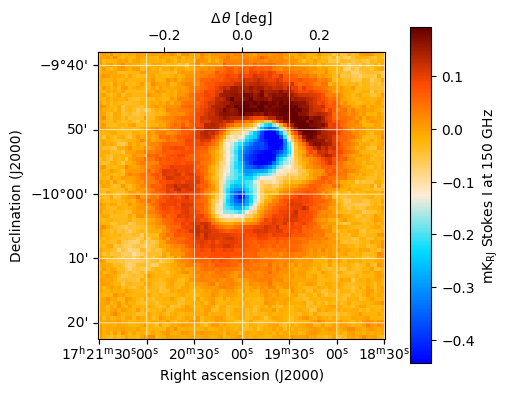

In [9]:
ml_mapper.map.plot(cmap="cmb")

that will improve more as it continues to fit.